<h2>INSURANCE PREMIUM CALCULATION</h2>
<h3>Dataset: Insurance premium data</h3>
<h4>Sharat KN</h4>

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

IMPORTING DATASET

In [2]:
ds = pd.read_csv("insurance.csv")

<H3>DATA EXPLORATION </H3>

In [3]:
type(ds) #check type

pandas.core.frame.DataFrame

In [4]:
print (ds.shape) #Check size

(1338, 7)


Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [5]:
ds.head(2) #display first 2 rows of the dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [6]:
ds.columns #display the columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
#Statistical Summary of Numeric Attributes
ds.describe(include='all', percentiles = [0.1,0.25,0.5,0.75,0.95])

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
10%,19.000000,NaN,22.990000,0.000000,NaN,NaN,2346.533615
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000


We do observe some outliers for dependent variable 'charges' from the above table.

In [8]:
print(ds.info()) #Check for null values and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [9]:
#Check for nulll values
ds.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<b>VISUALIZATIONS</b>

EFFECT OF AGE, and BMI on CHARGES

<AxesSubplot:xlabel='age', ylabel='bmi'>

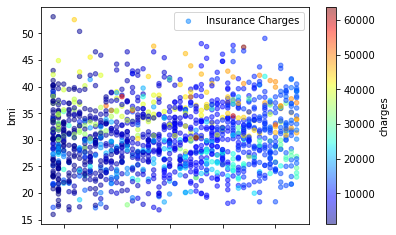

In [10]:

ds.plot(kind="scatter", x="age", y="bmi",alpha = 0.5,label="Insurance Charges", c="charges",cmap=plt.get_cmap("jet"),colorbar=True)

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='charges', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='charges', ylabel='bmi'>],
       [<AxesSubplot:xlabel='age', ylabel='charges'>,
        <AxesSubplot:xlabel='bmi', ylabel='charges'>,
        <AxesSubplot:xlabel='charges', ylabel='charges'>]], dtype=object)

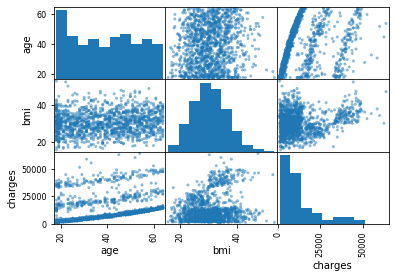

In [11]:
from pandas.plotting import scatter_matrix
attributes = ["age", "bmi","charges"]
scatter_matrix(ds[attributes])

<AxesSubplot:xlabel='bmi', ylabel='charges'>

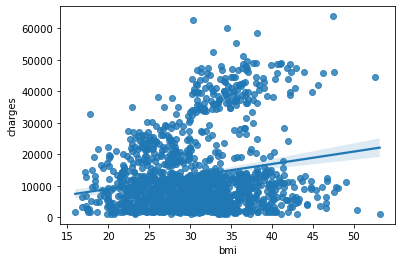

In [12]:
# BMI as potential predictor variable of Charges
sns.regplot(x="bmi", y="charges", data=ds)


Positive Correlation between BMI and Charges Observed

<AxesSubplot:xlabel='age', ylabel='charges'>

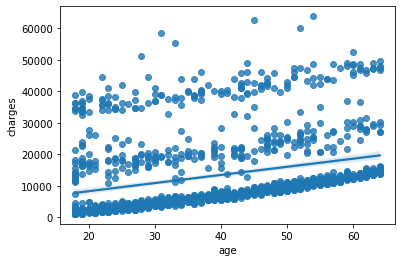

In [13]:
# Age as potential predictor variable of Charges
sns.regplot(x="age", y="charges", data=ds)


Positive Correlation between Age and Charges observed

Text(0.5, 1.0, 'Barplot of CHARGES by NO: OF CHILDREN')

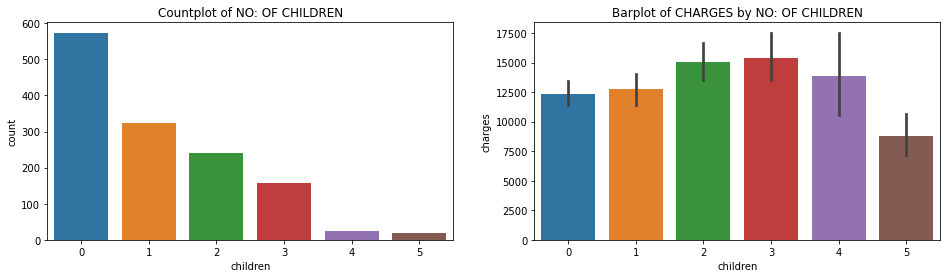

In [14]:
# Children as potential predictor variable of Charges
fig, axes =plt.subplots(1,2, figsize=(16,4))

sns.countplot(data=ds, x='children', ax=axes[0])
axes[0].set_title('Countplot of NO: OF CHILDREN')
sns.barplot(data=ds, x='children', y='charges', ax=axes[1])
axes[1].set_title('Barplot of CHARGES by NO: OF CHILDREN')

Number of Children do not show any particular affect on the dependent variable 'charges'. There seems to be no significant correlation between datasets. 

Text(0.5, 1.0, 'Barplot of CHARGES by REGION')

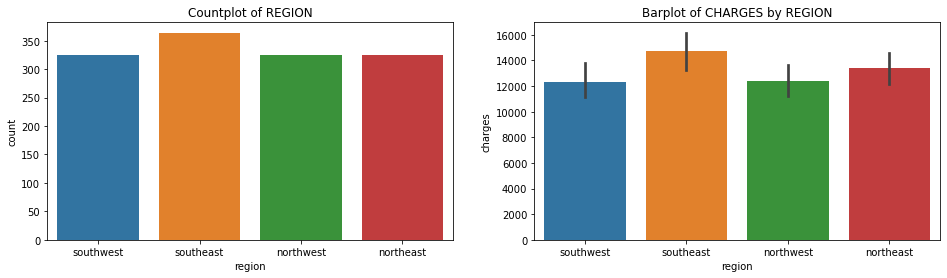

In [15]:
# Region as potential predictor variable of Charges

fig, axes =plt.subplots(1,2, figsize=(16,4))

sns.countplot(data=ds, x='region', ax=axes[0])
axes[0].set_title('Countplot of REGION')
sns.barplot(data=ds, x='region', y='charges', ax=axes[1])
axes[1].set_title('Barplot of CHARGES by REGION')

Dataset 'Region' do not show any particular affect on the dependent variable 'charges'. There seems to be no significant correlation between datasets.

Text(0.5, 1.0, 'Barplot of CHARGES by SMOKER')

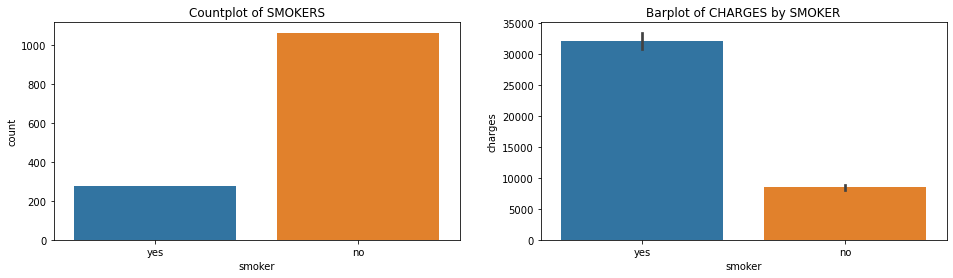

In [16]:
# Smoker as potential predictor variable of Charges
fig, axes =plt.subplots(1,2, figsize=(16,4))

sns.countplot(data=ds, x='smoker', ax=axes[0])
axes[0].set_title('Countplot of SMOKERS')
sns.barplot(data=ds, x='smoker', y='charges', ax=axes[1])
axes[1].set_title('Barplot of CHARGES by SMOKER')


Though we have comparatively less amount of individuals who are smokers, the charges are disproportionaly high for the smoker individuals compared to non smokers. The graph indicate a very high correlation for individuals with 'smoker' attribute

Text(0.5, 1.0, 'Barplot of CHARGES by SEX')

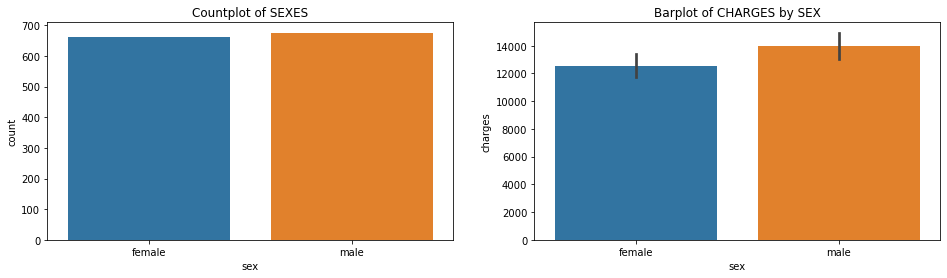

In [17]:
# Sex as potential predictor variable of Charges
fig, axes =plt.subplots(1,2, figsize=(16,4))

sns.countplot(data=ds, x='sex', ax=axes[0])
axes[0].set_title('Countplot of SEXES')
sns.barplot(data=ds, x='sex', y='charges', ax=axes[1])
axes[1].set_title('Barplot of CHARGES by SEX')

Here also we see the correlation between SEX and the dependent variable 'Charges' is very weak. But males do tend to be charged higher than females.

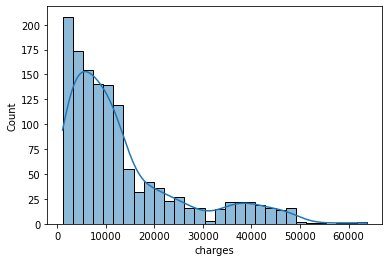

In [18]:
# Histogram for dependent variable 'Charges'

sns.histplot(data=ds, x='charges', kde=True)
plt.show()

The above dataset is positively skewed. This tells we need to apply some standardization technique on 'charges'.

<h3>PRE PROCESSING </h3>

We have found 3 attributes which are categorical - Sex, Smoker, and Region.
Hence we convert them from categorical variables into a binary vector representation.
We use <b>One Hot Encoder</b> for this purpose

In [19]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
ohe = OneHotEncoder(handle_unknown='ignore')

In [20]:
#perform one-hot encoding on 'smoker' column 
encoder_smoke = pd.DataFrame(ohe.fit_transform(ds[['smoker']]).toarray())
encoder_smoke.columns = ohe.get_feature_names_out(['smoker'])

#merge one-hot encoded columns back with original DataFrame
ds_1 = ds.join(encoder_smoke)

In [21]:
#perform one-hot encoding on 'sex' column 
encoder_sex = pd.DataFrame(ohe.fit_transform(ds_1[['sex']]).toarray())
encoder_sex.columns = ohe.get_feature_names_out(['sex'])

#merge one-hot encoded columns back with original DataFrame
ds_2 = ds_1.join(encoder_sex)

In [22]:
#perform one-hot encoding on 'region' column 
encoder_region = pd.DataFrame(ohe.fit_transform(ds_2[['region']]).toarray())
encoder_region.columns = ohe.get_feature_names_out(['region'])

ds_final = ds_2.join(encoder_region)

In [23]:
print(ds_final)

      age     sex     bmi  children smoker     region      charges  smoker_no  \
0      19  female  27.900         0    yes  southwest  16884.92400        0.0   
1      18    male  33.770         1     no  southeast   1725.55230        1.0   
2      28    male  33.000         3     no  southeast   4449.46200        1.0   
3      33    male  22.705         0     no  northwest  21984.47061        1.0   
4      32    male  28.880         0     no  northwest   3866.85520        1.0   
...   ...     ...     ...       ...    ...        ...          ...        ...   
1333   50    male  30.970         3     no  northwest  10600.54830        1.0   
1334   18  female  31.920         0     no  northeast   2205.98080        1.0   
1335   18  female  36.850         0     no  southeast   1629.83350        1.0   
1336   21  female  25.800         0     no  southwest   2007.94500        1.0   
1337   61  female  29.070         0    yes  northwest  29141.36030        0.0   

      smoker_yes  sex_femal

Dropping Redundant Columns from the dataset

In [24]:
#Drop Redundant Information from the final edited dataset
ds_final = ds_final.drop(columns=['smoker', 'region','sex'])

ds_final

,age,bmi,children,charges,smoker_no,smoker_yes,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


<h3>Correlation Analysis</h3>

In [25]:
ds_final.corr()

,age,bmi,children,charges,smoker_no,smoker_yes,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.025019,-0.025019,0.020856,-0.020856,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.003750,0.003750,-0.046371,0.046371,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.007673,0.007673,-0.017163,0.017163,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.787251,0.787251,-0.057292,0.057292,0.006349,-0.039905,0.073982,-0.043210
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,1.000000,-1.000000,0.076185,-0.076185,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-1.000000,1.000000,-0.076185,0.076185,0.002811,-0.036945,0.068498,-0.036945
sex_female,0.020856,-0.046371,-0.017163,-0.057292,0.076185,-0.076185,1.000000,-1.000000,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-0.076185,0.076185,-1.000000,1.000000,-0.002425,-0.011156,0.017117,-0.004184
region_northeast,0.002475,-0.138156,-0.022808,0.006349,-0.002811,0.002811,0.002425,-0.002425,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.036945,-0.036945,0.011156,-0.011156,-0.320177,1.000000,-0.346265,-0.320829


We observe that some variables like Age, BMI and Smoker_YES have significant positive correlation with Charges. While other attributes like Region, Sex and Number of Children has little to no affect on the dependent variable - Charges

So we delete them from final dataset before building a machine learning model

In [26]:
#Drop Redundant Information
ds_final = ds_final.drop(columns=['smoker_no', 'sex_female', 'children','region_northeast', 'region_northwest', 'region_southeast', 'region_southwest'])
ds_final

,age,bmi,charges,smoker_yes,sex_male
0,19,27.900,16884.92400,1.0,0.0
1,18,33.770,1725.55230,0.0,1.0
2,28,33.000,4449.46200,0.0,1.0
3,33,22.705,21984.47061,0.0,1.0
4,32,28.880,3866.85520,0.0,1.0
...,...,...,...,...,...
1333,50,30.970,10600.54830,0.0,1.0
1334,18,31.920,2205.98080,0.0,0.0
1335,18,36.850,1629.83350,0.0,0.0
1336,21,25.800,2007.94500,0.0,0.0


In [27]:
print(ds_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   bmi         1338 non-null   float64
 2   charges     1338 non-null   float64
 3   smoker_yes  1338 non-null   float64
 4   sex_male    1338 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 52.4 KB
None


<b> Separating X and y for Machine Learning Model </b>

In [28]:
X = ds_final.drop(columns='charges')
X

,age,bmi,smoker_yes,sex_male
0,19,27.900,1.0,0.0
1,18,33.770,0.0,1.0
2,28,33.000,0.0,1.0
3,33,22.705,0.0,1.0
4,32,28.880,0.0,1.0
...,...,...,...,...
1333,50,30.970,0.0,1.0
1334,18,31.920,0.0,0.0
1335,18,36.850,0.0,0.0
1336,21,25.800,0.0,0.0


In [29]:
y = ds_final[['charges']]
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


<h3> MODEL BUILDING </h3>

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
#Import Linear Regression Model from sklearn
from sklearn.linear_model import LinearRegression


Dividing the dataset into two train-test-split models as instructed in the assignment

In [31]:
# Test-Train Data Split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.1, random_state=0)

Initialize the k-fold cross-validation object

In [32]:
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True)

<h3>MODEL 1</h3>

In [33]:
#Create Models for Linear Regression
model_1 = LinearRegression()

In [34]:
# Perform K_FOLD cross-validation
cross_val_scores = cross_val_score(model_1, X_train1, y_train1, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)

# Calculate the average cross-validation score
average_score = cross_val_scores.mean()
print("Average cross-validation score:", average_score)

Cross-validation scores: [0.75606423 0.7154627  0.72539065 0.76875045 0.66074973]
Average cross-validation score: 0.7252835516377576


The average cross validation score of 0.72 suggests that the model explains approximately 72.5% of the variance in the target variable. This indicates that the model captures a substantial portion of the variability in the data, making it relatively effective in predicting the target variable.

In [35]:
#Apply Linear Regression to Train Samples
model_1.fit(X_train1, y_train1)

LinearRegression()

MAKING PREDICTION FOR TEST DATASET FOR MODEL 1

In [36]:
prediction_model1 = model_1.predict(X_test1) #Model Predictions for Test Data 1

<h3>MODEL 2</h3>

In [37]:
#Create Models for Linear Regression
model_2 = LinearRegression()

In [38]:
# Perform K_FOLD cross-validation
cross_val_scores = cross_val_score(model_2, X_train2, y_train2, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)

# Calculate the average cross-validation score
average_score = cross_val_scores.mean()
print("Average cross-validation score:", average_score)

Cross-validation scores: [0.75640641 0.69516305 0.71407232 0.7107148  0.77363428]
Average cross-validation score: 0.7299981728358853


The average cross-val score of 0.729 suggests that the model explains approximately 72.9% of the variance in the target variable. This indicates that the model captures a substantial portion of the variability in the data, making it relatively effective in predicting the target variable.

In [39]:
#Apply Linear Regression to Train Samples
model_2.fit(X_train2, y_train2)

LinearRegression()

MAKING PREDICTION FOR TEST DATASET FOR MODEL 2

In [40]:

prediction_model2 = model_2.predict(X_test2) #Model Predictions for Test Data 2

<h3>PERFORMANCE VISUALIZATION </h3>

ERROR/RESIDUAL DISTRIBUTION

Text(0.5, 1.0, 'Residual Distribution Plot for Model 2')

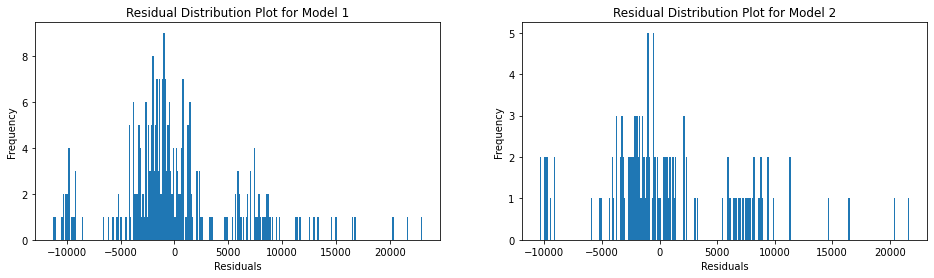

In [41]:
error_1 = y_test1 - prediction_model1
error_2 = y_test2 - prediction_model2

fig, axes =plt.subplots(1,2, figsize=(16,4))
axes[0].hist(error_1, bins = 268)
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Residual Distribution Plot for Model 1')

axes[1].hist(error_2, bins = 268)
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Residual Distribution Plot for Model 2')

Residual Distribution shows residuals are randomly scattered around the horizontal line at zero. This suggests that the model captures the underlying patterns well and the errors are mostly unbiased.

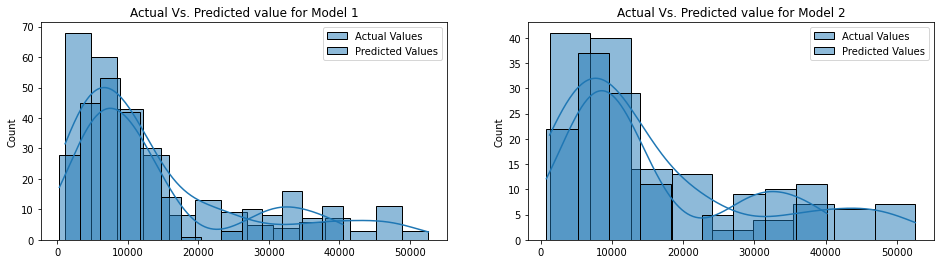

In [42]:
fig, axes =plt.subplots(1,2, figsize=(16,4))

sns.histplot(y_test1, kde=True, label="Actual Values", color="g", ax=axes[0])
sns.histplot(prediction_model1, kde=True, label="Predicted Values", color="r", ax=axes[0])

sns.histplot(y_test2, kde=True, color="g", label="Actual Values", ax=axes[1])
sns.histplot(prediction_model2, kde=True, color="r", label="Predicted Values", ax=axes[1])

# Set titles for subplots
axes[0].set_title("Actual Vs. Predicted value for Model 1")
axes[1].set_title("Actual Vs. Predicted value for Model 2")

# Add legends to subplots
axes[0].legend()
axes[1].legend()

Kernel Density Estimation follows a same pattern for actual and predicted values in both the models. Our models only deviates very slightly from the actual values.

<h3>PERFORMANCE MEASURES </h3>

CALCULATING MEAN ABSOLUTE ERROR FOR BOTH MODELS

In [43]:
from sklearn.metrics import mean_absolute_error

MAE_Model1 = mean_absolute_error(y_test1, prediction_model1)
MAE_Model2 = mean_absolute_error(y_test2, prediction_model2)


CALCULATING ROOT MEAN SQUARE ERRORS

In [44]:
from sklearn.metrics import mean_squared_error


lin_mse_1 = mean_squared_error(y_test1, prediction_model1)
lin_mse_2 = mean_squared_error(y_test2, prediction_model2)
lin_rmse_1 = np.sqrt(lin_mse_1)
lin_rmse_2 = np.sqrt(lin_mse_2)



CALCULATING R2-SCORES FOR BOTH MODELS

In [45]:
from sklearn.metrics import r2_score
r2_score_1 = r2_score(y_test1, prediction_model1)
r2_score_2 = r2_score(y_test2, prediction_model2)


LISTING PERFORMANCE IN TUBULAR FORMAT

In [46]:
df = pd.DataFrame(columns=['MODEL','MAE','RMSE','R2-Score'])
df['MODEL'] = ('MODEL 1', 'MODEL 2')
df['MAE'] = (MAE_Model1, MAE_Model2)
df['RMSE'] = (lin_rmse_1, lin_rmse_2)
df['R2-Score'] = (r2_score_1, r2_score_2)
df

,MODEL,MAE,RMSE,R2-Score
0,MODEL 1,3961.100225,5717.913547,0.794542
1,MODEL 2,4265.132111,5914.071874,0.819620


Both of the Models show equal variance. The other evaluation metrics are also almost the same. The "Actual vs Predicted Values" for both models graph also tells us that the performance is more or less same. 